In [2]:
#Importing Liabraries and Loading Data Import pandas as pd 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
# loading data set 
file_path = 'Online Sales Data.csv'
data = pd.read_csv(file_path)


In [6]:
# Displaying the first few rows of the dataset
print(data.head())

   Transaction ID        Date Product Category             Product Name  \
0           10001  2024-01-01      Electronics            iPhone 14 Pro   
1           10002  2024-01-02  Home Appliances         Dyson V11 Vacuum   
2           10003  2024-01-03         Clothing         Levi's 501 Jeans   
3           10004  2024-01-04            Books        The Da Vinci Code   
4           10005  2024-01-05  Beauty Products  Neutrogena Skincare Set   

   Units Sold  Unit Price  Total Revenue         Region Payment Method  
0           2      999.99        1999.98  North America    Credit Card  
1           1      499.99         499.99         Europe         PayPal  
2           3       69.99         209.97           Asia     Debit Card  
3           4       15.99          63.96  North America    Credit Card  
4           1       89.99          89.99         Europe         PayPal  


In [7]:
#Get the structure and summary of dataset 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB
None


In [8]:
# display the statistics of the dataset 
print(data.describe())

       Transaction ID  Units Sold   Unit Price  Total Revenue
count       240.00000  240.000000   240.000000     240.000000
mean      10120.50000    2.158333   236.395583     335.699375
std          69.42622    1.322454   429.446695     485.804469
min       10001.00000    1.000000     6.500000       6.500000
25%       10060.75000    1.000000    29.500000      62.965000
50%       10120.50000    2.000000    89.990000     179.970000
75%       10180.25000    3.000000   249.990000     399.225000
max       10240.00000   10.000000  3899.990000    3899.990000


In [10]:
# Analyse sales Trend overtime 
#Convert data column to datatime
data['Date'] = pd.to_datetime(data['Date'])

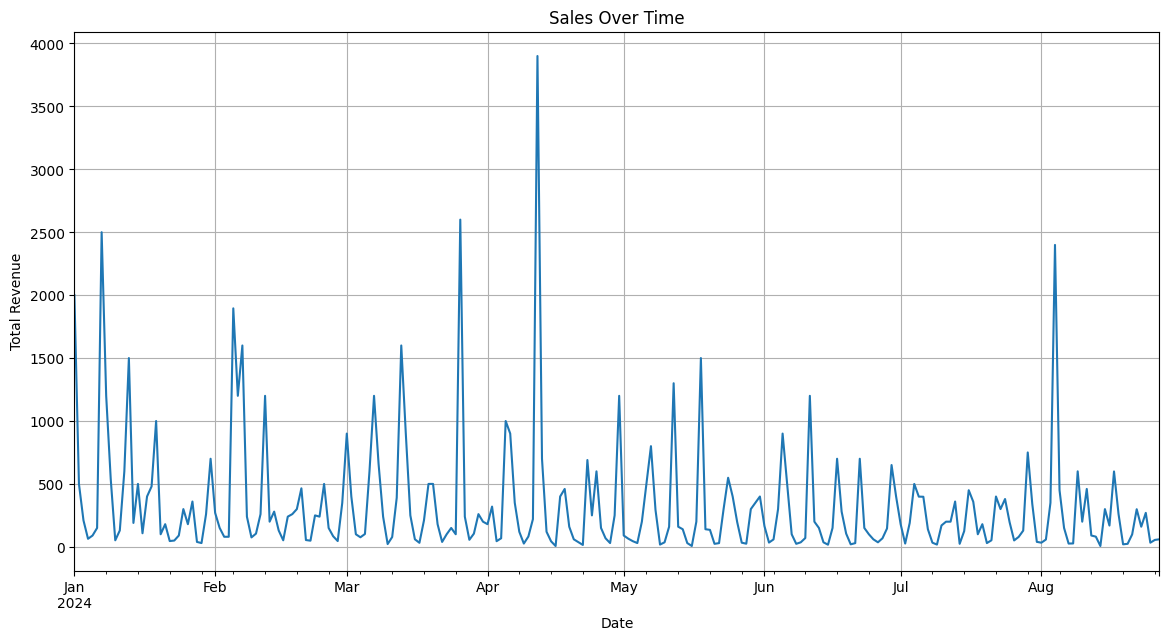

In [14]:
# Plotting sales over time
plt.figure(figsize=(14,7))
data.groupby('Date').sum()['Total Revenue'].plot()
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

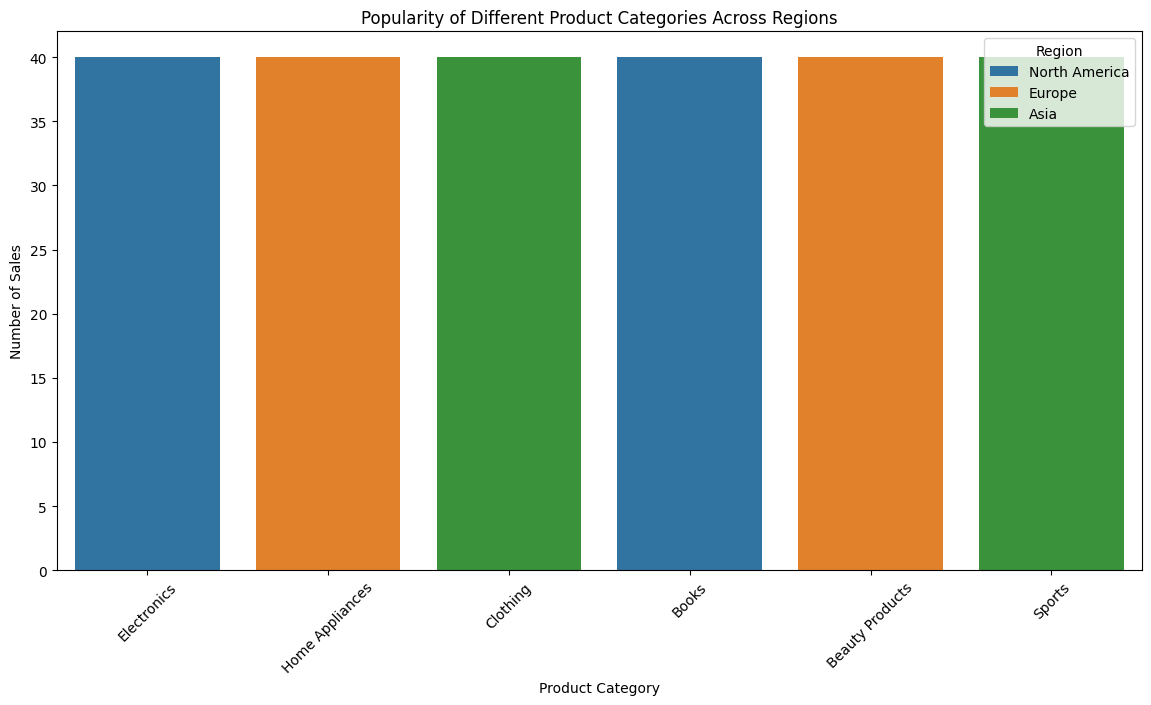

In [16]:
#Explore Popularity of Different Product Categories Across Regions
plt.figure(figsize=(14,7))
sns.countplot(x='Product Category', hue='Region', data=data)
plt.title('Popularity of Different Product Categories Across Regions')
plt.xlabel('Product Category')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()


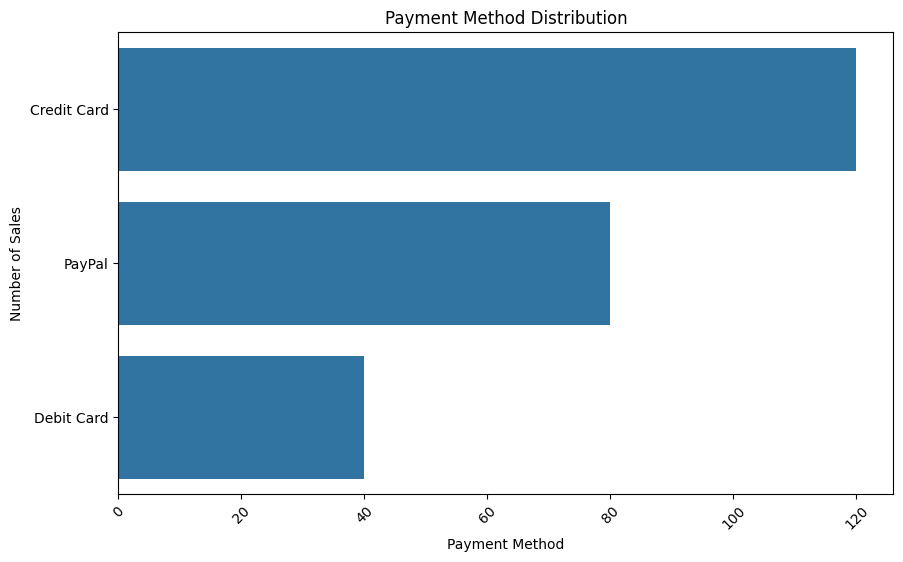

In [17]:
#Investigate Impact of Payment Methods on Sales Volume or Revenue
# Revenue by Payment Method
plt.figure(figsize=(10,6))
sns.countplot(data['Payment Method'])
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()



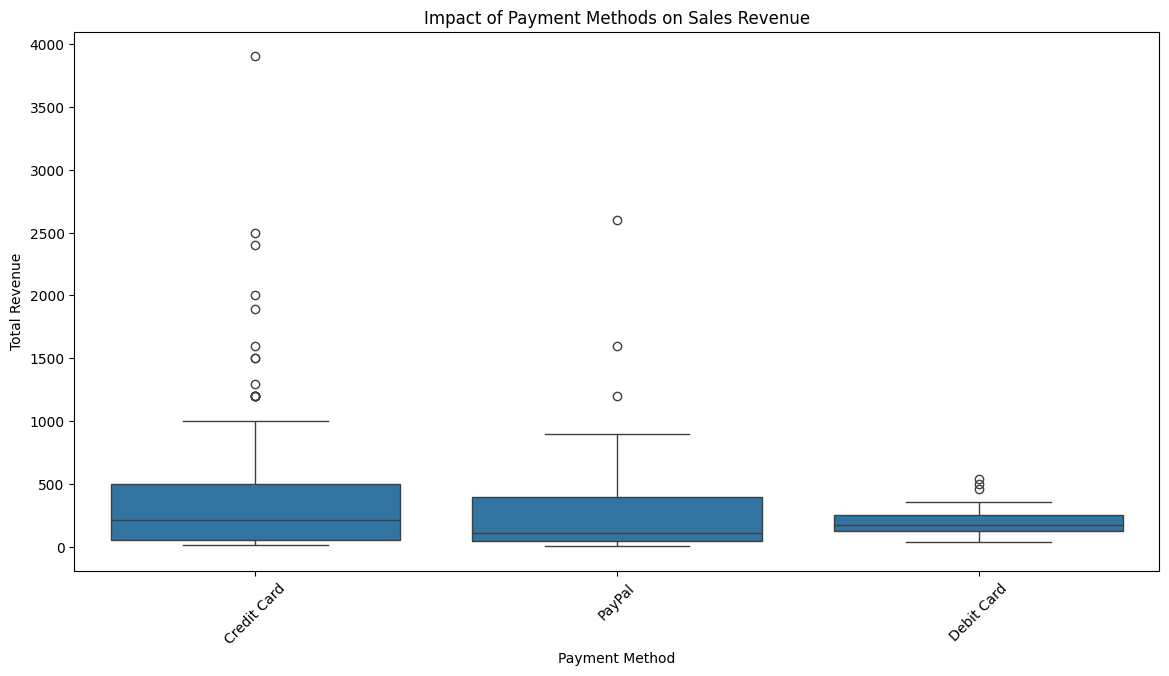

In [19]:
#Revenue by Payment Method
plt.figure(figsize=(14,7))
sns.boxplot(x='Payment Method', y='Total Revenue', data=data)
plt.title('Impact of Payment Methods on Sales Revenue')
plt.xlabel('Payment Method')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


In [21]:
# Identify Top-Selling Products Within Each Category
# Group by Product Category and Product Name, then sum the Units Sold
top_selling_products = data.groupby(['Product Category', 'Product Name']).agg({'Units Sold': 'sum'}).sort_values(by='Units Sold', ascending=False).groupby(level=0).head(10)

# Print the top-selling products
print(top_selling_products)

                                                                   Units Sold
Product Category Product Name                                                
Clothing         Hanes ComfortSoft T-Shirt                                 10
Books            The Catcher in the Rye by J.D. Salinger                    7
Clothing         Nike Air Force 1                                           6
                 Gap Essential Crewneck T-Shirt                             6
Sports           Spalding NBA Street Basketball                             6
                 Yeti Rambler Tumbler                                       6
Clothing         Forever 21 Graphic Tee                                     5
                 Adidas 3-Stripes Shorts                                    5
                 Tommy Hilfiger Polo Shirt                                  5
Books            The Girl with the Dragon Tattoo by Stieg Larsson           5
Clothing         Calvin Klein Boxer Briefs                      

In [22]:
# Identify Top-Selling Products Within Each Category
top_selling_products = data.groupby(['Product Category', 'Product Name']).agg({'Units Sold': 'sum'}).sort_values(by='Units Sold', ascending=False).groupby(level=0).head(10)

top_selling_products


Units Sold
Product Category Product Name                                                
Clothing         Hanes ComfortSoft T-Shirt                                 10
Books            The Catcher in the Rye by J.D. Salinger                    7
Clothing         Nike Air Force 1                                           6
                 Gap Essential Crewneck T-Shirt                             6
Sports           Spalding NBA Street Basketball                             6
                 Yeti Rambler Tumbler                                       6
Clothing         Forever 21 Graphic Tee                                     5
                 Adidas 3-Stripes Shorts                                    5
                 Tommy Hilfiger Polo Shirt                                  5
Books            The Girl with the Dragon Tattoo by Stieg Larsson           5
Clothing         Calvin Klein Boxer Briefs                                  5
Books            The Silent Patient by Alex Michaelides                     5
Sports           Titleist Pro V1 Golf Balls                                 5
                 Wilson Evolution Basketball                                5
Clothing         Under Armour HeatGear T-Shirt                              5
Books            The Da Vinci Code                                          4
Clothing         Old Navy Relaxed-Fit T-Shirt                               4
Books            The Girl on the Train by Paula Hawkins                     4
                 Dune by Frank Herbert                                      4
                 The Hunger Games by Suzanne Collins                        4
Electronics      Anker PowerCore Portable Charger                           4
Books            Becoming by Michelle Obama                                 4
Electronics      Amazon Echo Dot (4th Gen)                                  4
Clothing         Adidas Originals Superstar Sneakers                        4
Books            To Kill a Mockingbird by Harper Lee                        4
                 Where the Crawdads Sing by Delia Owens                     4
Sports           Manduka PRO Yoga Mat                                       4
                 Hydro Flask Wide Mouth Water Bottle                        4
                 Fitbit Versa 3                                             3
Electronics      Amazon Fire TV Stick 4K                                    3
Sports           Nike Metcon 6                                              3
Electronics      Nintendo Switch                                            3
Sports           Rogue Fitness Kettlebell                                   3
Home Appliances  Keurig K-Elite Coffee Maker                                3
Electronics      Sony WH-1000XM4 Headphones                                 3
                 Bose SoundLink Revolve+ Speaker                            3
Sports           Adidas FIFA World Cup Football                             3
Electronics      GoPro HERO10 Black                                         3
Home Appliances  Eufy RoboVac 11S                                           3
                 Instant Pot Duo                                            3
Electronics      Apple Watch Series 8                                       3
Home Appliances  Breville Smart Grill                                       2
                 Crock-Pot 6-Quart Slow Cooker                              2
                 Cuisinart Coffee Center                                    2
                 Instant Pot Duo Evo Plus                                   2
                 Blueair Classic 480i                                       2
Electronics      Logitech MX Master 3 Mouse                                 2
Home Appliances  Anova Precision Cooker                                     2
Electronics      iPhone 14 Pro                                              2
Home Appliances  Shark IQ Robot Vacuum                                      2
Beauty Prod

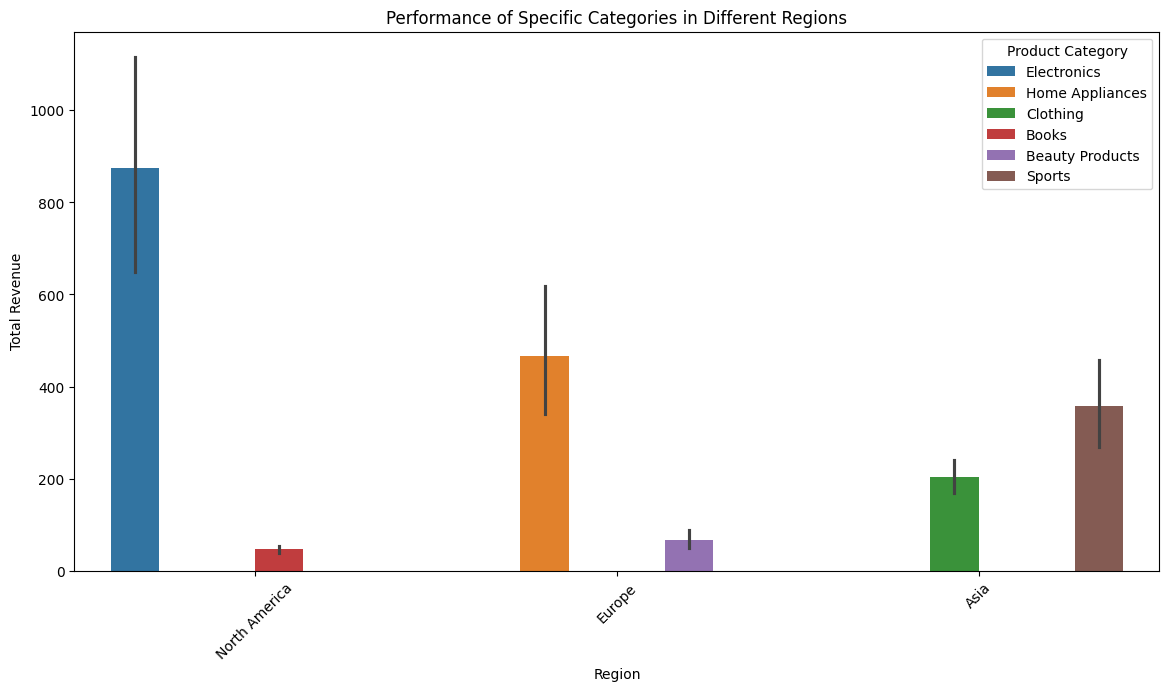

In [23]:
#Evaluate Performance of Specific Products or Categories in Different Regions
plt.figure(figsize=(14,7))
sns.barplot(x='Region', y='Total Revenue', hue='Product Category', data=data)
plt.title('Performance of Specific Categories in Different Regions')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()
